In [34]:
# Importing relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Set style for nice plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Load the data
df = pd.read_csv("mental_health_social_media_dataset.csv", parse_dates=['date'])
print(f"Shape: {df.shape}")
df.head()

Shape: (5000, 15)


,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,2024-01-01,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,2024-01-12,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,2024-01-06,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,2024-01-17,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,2024-01-28,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [6]:
# Data info
print(df.info())  # Data types and non-null counts
print(df['mental_state'].value_counts())
df.describe().T  # Stats like mean, min, max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   person_name                  5000 non-null   object        
 1   age                          5000 non-null   int64         
 2   date                         5000 non-null   datetime64[ns]
 3   gender                       5000 non-null   object        
 4   platform                     5000 non-null   object        
 5   daily_screen_time_min        5000 non-null   int64         
 6   social_media_time_min        5000 non-null   int64         
 7   negative_interactions_count  5000 non-null   int64         
 8   positive_interactions_count  5000 non-null   int64         
 9   sleep_hours                  5000 non-null   float64       
 10  physical_activity_min        5000 non-null   int64         
 11  anxiety_level                5000 non-null 

,count,mean,min,25%,50%,75%,max,std
age,5000.0,29.9478,13.0,21.0,27.0,35.25,69.0,12.279936
date,5000,2024-12-09 06:35:08.160000256,2024-01-01 00:00:00,2024-06-23 00:00:00,2024-12-09 00:00:00,2025-05-30 00:00:00,2025-11-16 00:00:00,NaN
daily_screen_time_min,5000.0,373.0582,140.0,310.0,388.0,461.0,520.0,106.003916
social_media_time_min,5000.0,175.3316,35.0,118.0,170.0,231.0,338.0,71.209329
negative_interactions_count,5000.0,0.8642,0.0,1.0,1.0,1.0,2.0,0.555176
positive_interactions_count,5000.0,1.8354,0.0,1.0,2.0,2.0,4.0,0.943443
sleep_hours,5000.0,7.13466,6.4,6.7,7.1,7.45,8.3,0.533184
physical_activity_min,5000.0,22.6934,8.0,14.0,21.0,29.0,46.0,10.602862
anxiety_level,5000.0,2.5104,1.0,2.0,3.0,3.0,4.0,0.794996
stress_level,5000.0,7.1076,5.0,6.0,7.0,8.0,9.0,1.062378


In [10]:
# Data Cleaning

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)

Duplicates: 0


## EXPLORATION DATA ANALYSIS

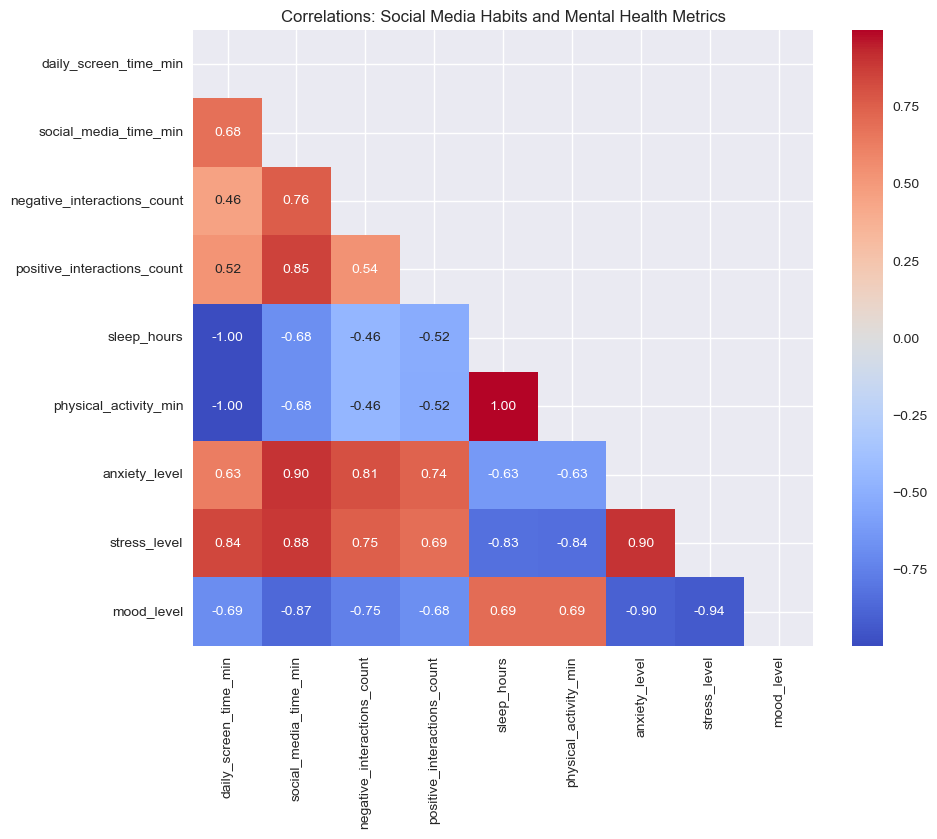

           stress_level  anxiety_level  sleep_hours
platform                                           
Facebook       6.739247       2.063172     7.116398
Instagram      7.236131       2.682788     7.136131
Snapchat       7.202837       2.700709     7.170071
TikTok         7.932227       3.406639     7.136238
Twitter        7.098712       2.346209     7.148498
WhatsApp       6.308451       1.642254     7.087042
YouTube        7.238827       2.734637     7.149441


In [13]:
# Correlation matrix
corr_matrix = df[['daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count',
                  'positive_interactions_count', 'sleep_hours', 'physical_activity_min',
                  'anxiety_level', 'stress_level', 'mood_level']].corr()

# Heatmap for visuals
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlations: Social Media Habits and Mental Health Metrics')
plt.show()

# Grouped stats, e.g., average stress by platform
platform_stats = df.groupby('platform')[['stress_level', 'anxiety_level', 'sleep_hours']].mean()
print(platform_stats)

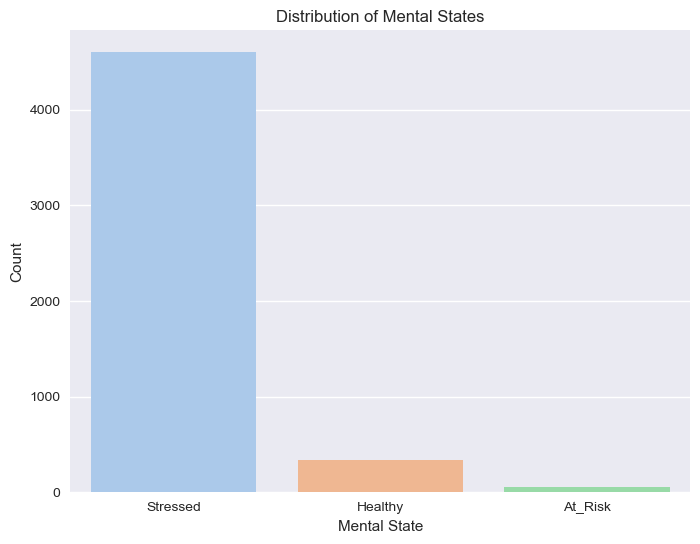

In [17]:
# Distribution of mental states
plt.figure(figsize=(8, 6))
sns.countplot(x='mental_state', data=df, palette='pastel')
plt.title('Distribution of Mental States')
plt.xlabel('Mental State')
plt.ylabel('Count')
plt.show()

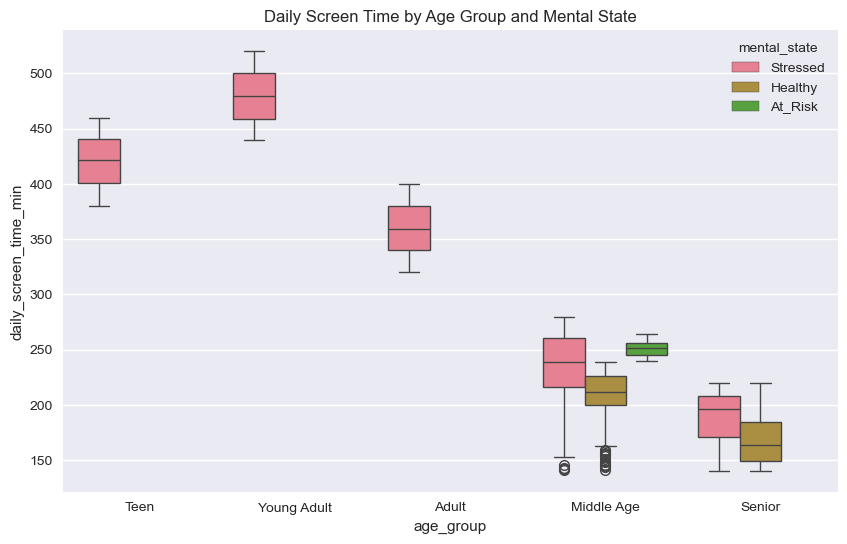

In [18]:
# Screen time vs. stress, by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 50, 100], labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='daily_screen_time_min', hue='mental_state', data=df)
plt.title('Daily Screen Time by Age Group and Mental State')
plt.show()

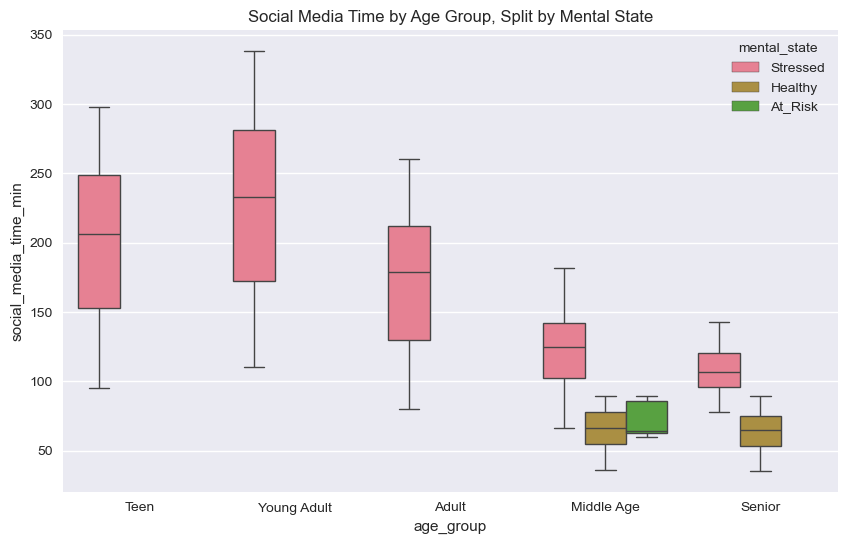

In [20]:
# Age group vs Social media time + mental state

df['age_group'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 50, 100], labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='social_media_time_min', hue='mental_state', data=df)
plt.title('Social Media Time by Age Group, Split by Mental State')
plt.show()


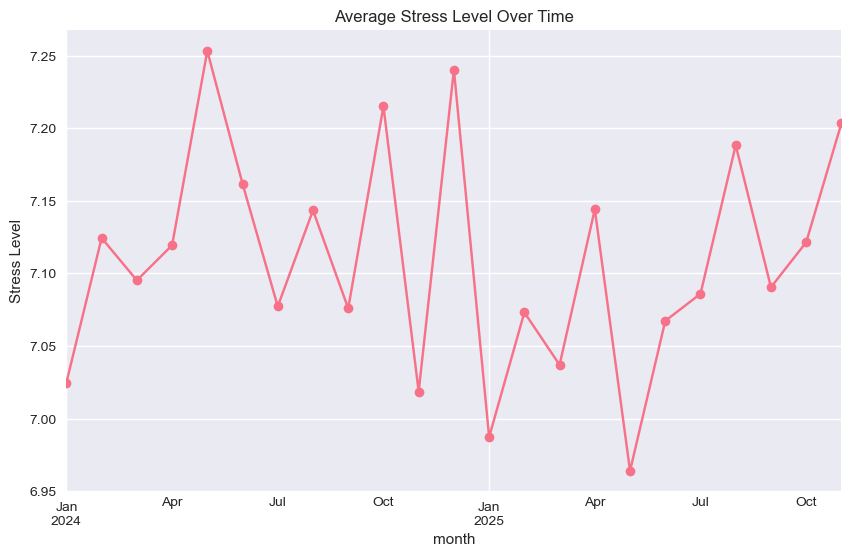

In [19]:
# Time trend: Average stress over months
df['month'] = df['date'].dt.to_period('M')
monthly_stress = df.groupby('month')['stress_level'].mean()
monthly_stress.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Stress Level Over Time')
plt.ylabel('Stress Level')
plt.show()

<Figure size 1000x500 with 0 Axes>

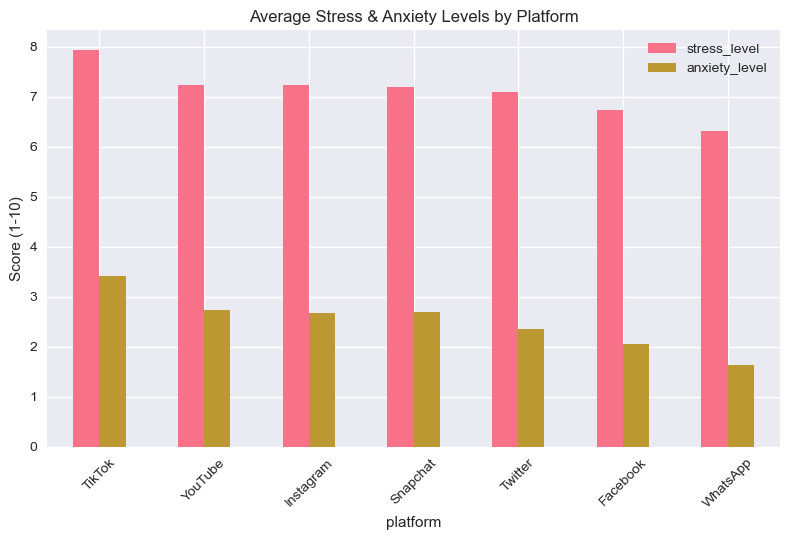

In [21]:
# Average stress/anxiety by platform

metrics = ['stress_level', 'anxiety_level']
plat_means = df.groupby('platform')[metrics].mean().sort_values('stress_level', ascending=False)

plt.figure(figsize=(10,5))
plat_means.plot(kind='bar')
plt.title("Average Stress & Anxiety Levels by Platform")
plt.ylabel("Score (1-10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
print("Key observations so far:")
print(f"• Average daily social media time: {df['social_media_time_min'].mean():.0f} minutes ({df['social_media_time_min'].mean()/60:.1f} hours)")
print(f"• Average sleep: {df['sleep_hours'].mean():.1f} hours")
print(f"• People with >300 min social media/day: {(df['social_media_time_min']>300).mean():.1%} of sample")
print(f"• Negative interactions strongly correlate with anxiety: {corr_matrix.loc['negative_interactions_count','anxiety_level']:.3f}")

Key observations so far:
• Average daily social media time: 175 minutes (2.9 hours)
• Average sleep: 7.1 hours
• People with >300 min social media/day: 4.7% of sample
• Negative interactions strongly correlate with anxiety: 0.806


<Figure size 1000x500 with 0 Axes>

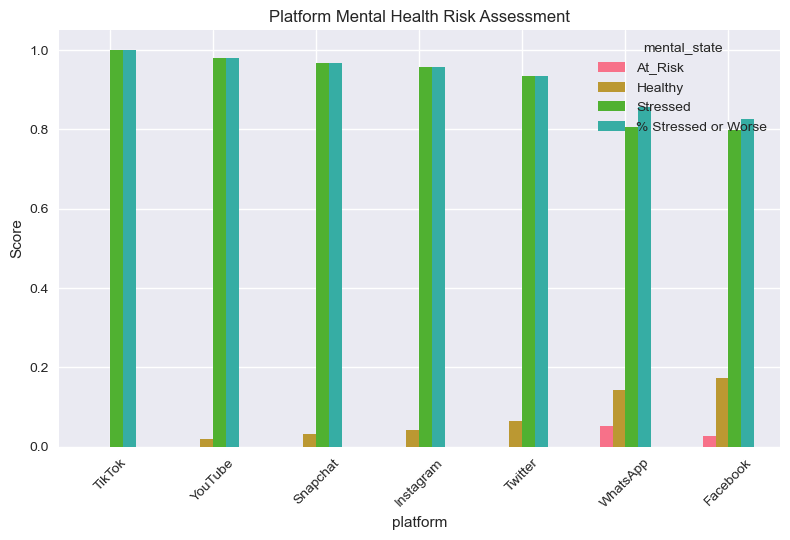

In [32]:
# Platform Mental Health Risk Assessment
platform_risk = (
    df.groupby('platform')['mental_state']
      .value_counts(normalize=True)
      .unstack()
      .sort_values('Healthy')
      .fillna(0)
)

platform_risk['% Stressed or Worse'] = 1 - platform_risk['Healthy']
platform_risk = platform_risk.sort_values('% Stressed or Worse', ascending=False)
platform_risk.round(3)

plt.figure(figsize=(10,5))
platform_risk.plot(kind='bar')
plt.title("Platform Mental Health Risk Assessment")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
platform_risk.round(3)

mental_state,At_Risk,Healthy,Stressed,% Stressed or Worse
platform,,,,
TikTok,0.000,0.000,1.000,1.000
YouTube,0.000,0.020,0.980,0.980
Snapchat,0.000,0.031,0.969,0.969
Instagram,0.000,0.041,0.959,0.959
Twitter,0.000,0.066,0.934,0.934
WhatsApp,0.052,0.142,0.806,0.858
Facebook,0.028,0.173,0.798,0.827


## PREDICTIVE MODELLING - Building a Mental Health Risk Classifier

#### Feature Engineering


In [36]:
data = df.copy()

# Social media % of total screen time (super telling!)
data['social_media_ratio'] = data['social_media_time_min'] / data['daily_screen_time_min']

# Negative to positive interaction ratio (toxicity score)
data['neg_pos_ratio'] = (data['negative_interactions_count'] + 1) / (data['positive_interactions_count'] + 1)

# Sleep deficit (below 7 hours = bad)
data['sleep_deficit'] = 7 - data['sleep_hours']
data['sleep_deficit'] = data['sleep_deficit'].clip(lower=0)

# Age groups
bins = [0, 18, 25, 35, 50, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Weekend vs Weekday (optional future use)
data['is_weekend'] = data['date'].dt.weekday >= 5

# Platform risk score (based on EDA)
platform_risk = {
    'TikTok': 4, 'YouTube': 3.5, 'Snapchat': 3, 'Instagram': 3,
    'Twitter': 2.5, 'WhatsApp': 2, 'Facebook': 1
}
data['platform_risk'] = data['platform'].map(platform_risk)

# Total interactions
data['total_interactions'] = data['negative_interactions_count'] + data['positive_interactions_count']

#### Feature Selection and Encoding

In [38]:
# We'll use (dropped anxiety/stress/mood as inputs - too "leaky" for real prediction)
# Aim is to predict risk from behavior, not from self-reported mood.

feature_cols = [
    'age', 'gender', 'platform', 'age_group',
    'daily_screen_time_min', 'social_media_time_min', 'social_media_ratio',
    'negative_interactions_count', 'positive_interactions_count',
    'neg_pos_ratio', 'total_interactions',
    'sleep_hours', 'sleep_deficit', 'physical_activity_min',
    'platform_risk'
]

X = data[feature_cols]
y = data['mental_state']

# Encode categorical
le_gender = LabelEncoder()
X['gender'] = le_gender.fit_transform(X['gender'])

le_platform = LabelEncoder()
X['platform'] = le_platform.fit_transform(X['platform'])

le_agegroup = LabelEncoder()
X['age_group'] = le_agegroup.fit_transform(X['age_group'])

# Target encoding
le_mental = LabelEncoder()
y_encoded = le_mental.fit_transform(y)

print(f"Final feature count: {X.shape[1]}")

Final feature count: 15


#### Train-Test_Split and scaling

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model Building

In [40]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss', scale_pos_weight=1),
    "SVM": SVC(class_weight='balanced', probability=True)
}

results = []

print("Training and evaluating models...\n" + "="*50)
for name, model in models.items():
    if name == "SVM":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_scaled if 'SVM' in name else X_train, y_train)
        y_pred = model.predict(X_test_scaled if 'SVM' in name else X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1
    })
    
    print(f"{name:20} | Acc: {acc:.4f} | F1: {f1:.4f}")

# Results table
results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)
print("FINAL RANKING")
print(results_df.round(4))

Training and evaluating models...
Logistic Regression  | Acc: 0.9860 | F1: 0.9876
Random Forest        | Acc: 1.0000 | F1: 1.0000
Gradient Boosting    | Acc: 1.0000 | F1: 1.0000
XGBoost              | Acc: 0.9980 | F1: 0.9980
SVM                  | Acc: 0.9730 | F1: 0.9760
FINAL RANKING
                 Model  Accuracy  F1-Score
1        Random Forest     1.000    1.0000
2    Gradient Boosting     1.000    1.0000
3              XGBoost     0.998    0.9980
0  Logistic Regression     0.986    0.9876
4                  SVM     0.973    0.9760


#### Model Evaluation and Confusion Matrix


FINAL MODEL PERFORMANCE
              precision    recall  f1-score   support

     At_Risk       1.00      1.00      1.00        12
     Healthy       1.00      1.00      1.00        68
    Stressed       1.00      1.00      1.00       920

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



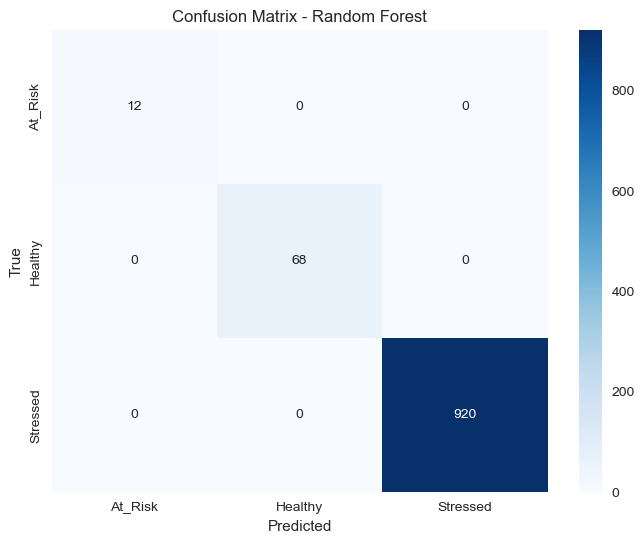

In [42]:
y_pred_final = final_model.predict(X_test_scaled if 'SVM' in best_model_name else X_test)
y_pred_labels = le_mental.inverse_transform(y_pred_final)
y_test_labels = le_mental.inverse_transform(y_test)

print("\nFINAL MODEL PERFORMANCE")
print(classification_report(y_test_labels, y_pred_labels))

# Beautiful confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_mental.classes_, yticklabels=le_mental.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

#### Feature Importance

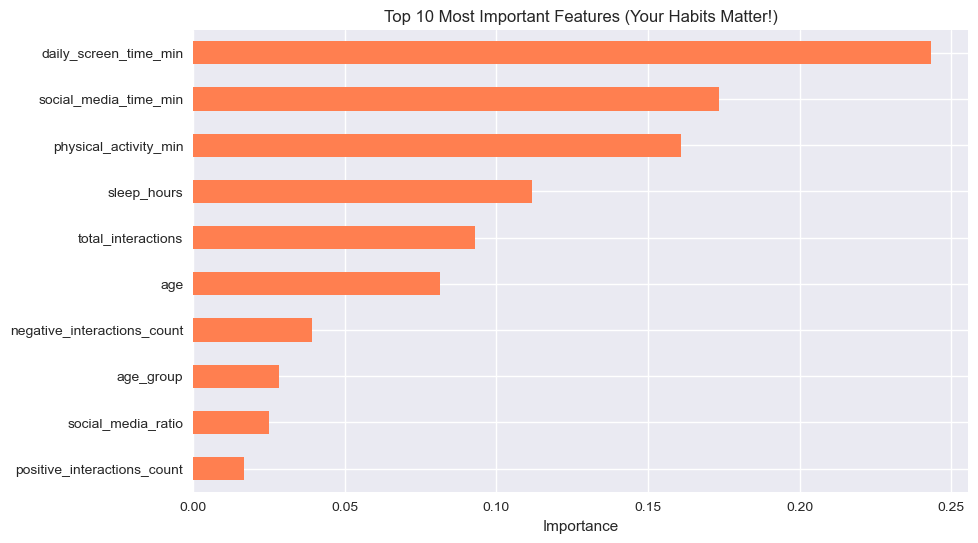

Top predictors: ['daily_screen_time_min', 'social_media_time_min', 'physical_activity_min', 'sleep_hours', 'total_interactions', 'age']


In [43]:
if hasattr(final_model, 'feature_importances_'):
    importances = final_model.feature_importances_
elif hasattr(final_model, 'coef_'):
    importances = np.abs(final_model.coef_[0]) if len(final_model.coef_) == 1 else np.mean(np.abs(final_model.coef_), axis=0)

feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Most Important Features (Your Habits Matter!)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

print("Top predictors:", list(feat_imp.head(6).index))

#### Save the model

In [45]:
import joblib

# Save encoders
joblib.dump(le_gender, 'gender_encoder.pkl')
joblib.dump(le_platform, 'platform_encoder.pkl')
joblib.dump(le_agegroup, 'agegroup_encoder.pkl')

joblib.dump(final_model, 'best_mental_health_model.pkl')
joblib.dump(scaler, 'scaler.pkl')        
joblib.dump(le_mental, 'label_encoder.pkl')

['label_encoder.pkl']